<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Access-DB2-on-Cloud-using-Python" data-toc-modified-id="Access-DB2-on-Cloud-using-Python-1">Access DB2 on Cloud using Python</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1:-Import-the-ibm_db-Python-library" data-toc-modified-id="1:-Import-the-ibm_db-Python-library-1.0.1">1: Import the <code>ibm_db</code> Python library</a></span></li><li><span><a href="#2:-Create-the-database-connection" data-toc-modified-id="2:-Create-the-database-connection-1.0.2">2: Create the database connection</a></span></li><li><span><a href="#3:-Create-a-table-in-the-database" data-toc-modified-id="3:-Create-a-table-in-the-database-1.0.3">3: Create a table in the database</a></span></li><li><span><a href="#4:-Insert-data-into-the-table" data-toc-modified-id="4:-Insert-data-into-the-table-1.0.4">4: Insert data into the table</a></span></li><li><span><a href="#5:-Query-data-in-the-table" data-toc-modified-id="5:-Query-data-in-the-table-1.0.5">5: Query data in the table</a></span></li><li><span><a href="#6:-Update-data-in-the-table" data-toc-modified-id="6:-Update-data-in-the-table-1.0.6">6: Update data in the table</a></span></li><li><span><a href="#7:-Retrieve-data-into-Pandas-dataframe" data-toc-modified-id="7:-Retrieve-data-into-Pandas-dataframe-1.0.7">7: Retrieve data into Pandas dataframe</a></span></li><li><span><a href="#8:-Close-the-Connection" data-toc-modified-id="8:-Close-the-Connection-1.0.8">8: Close the Connection</a></span></li></ul></li></ul></li><li><span><a href="#Access-Databases-with-SQL-Magic" data-toc-modified-id="Access-Databases-with-SQL-Magic-2">Access Databases with SQL Magic</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1:-load-the-ipython-sql-extension" data-toc-modified-id="1:-load-the-ipython-sql-extension-2.0.1">1: load the ipython-sql extension</a></span></li><li><span><a href="#2:-connect" data-toc-modified-id="2:-connect-2.0.2">2: connect</a></span></li><li><span><a href="#3:-create-table" data-toc-modified-id="3:-create-table-2.0.3">3: create table</a></span></li><li><span><a href="#4:-Using-Python-Variables-in-your-SQL-Statements" data-toc-modified-id="4:-Using-Python-Variables-in-your-SQL-Statements-2.0.4">4: Using Python Variables in your SQL Statements</a></span></li><li><span><a href="#5:-Assigning-the-Results-of-Queries-to-Python-Variables-(cursor)" data-toc-modified-id="5:-Assigning-the-Results-of-Queries-to-Python-Variables-(cursor)-2.0.5">5: Assigning the Results of Queries to Python Variables (cursor)</a></span></li><li><span><a href="#6:-convert-cursor-to-a-pandas-dataframe" data-toc-modified-id="6:-convert-cursor-to-a-pandas-dataframe-2.0.6">6: convert cursor to a pandas dataframe</a></span></li><li><span><a href="#7:-%%-Sql-Magic-configuration" data-toc-modified-id="7:-%%-Sql-Magic-configuration-2.0.7">7: %% Sql Magic configuration</a></span></li><li><span><a href="#8:-close-connection" data-toc-modified-id="8:-close-connection-2.0.8">8: close connection</a></span></li></ul></li></ul></li><li><span><a href="#Example:-Chicago-Public-Schools---Progress-Report-Cards-(2011-2012)" data-toc-modified-id="Example:-Chicago-Public-Schools---Progress-Report-Cards-(2011-2012)-3">Example: Chicago Public Schools - Progress Report Cards (2011-2012)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Store-the-dataset-in-a-Table" data-toc-modified-id="1.-Store-the-dataset-in-a-Table-3.0.1">1. Store the dataset in a Table</a></span></li><li><span><a href="#2.-Connect-to-the-database" data-toc-modified-id="2.-Connect-to-the-database-3.0.2">2. Connect to the database</a></span></li><li><span><a href="#3.-Query-the-database-system-catalog-to-retrieve-table-metadata" data-toc-modified-id="3.-Query-the-database-system-catalog-to-retrieve-table-metadata-3.0.3">3. Query the database system catalog to retrieve table metadata</a></span></li><li><span><a href="#4.-Query-the-database-system-catalog-to-retrieve-column-metadata" data-toc-modified-id="4.-Query-the-database-system-catalog-to-retrieve-column-metadata-3.0.4">4. Query the database system catalog to retrieve column metadata</a></span></li><li><span><a href="#4.-SQL-examples" data-toc-modified-id="4.-SQL-examples-3.0.5">4. SQL examples</a></span></li></ul></li></ul></li></ul></div>

# Access DB2 on Cloud using Python

### 1: Import the `ibm_db` Python library

The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.

In [4]:
import ibm_db

### 2: Create the database connection

Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.


In [5]:
# Identify the database connection credentials
dsn = "DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=cdq34813;PWD=1l7vj7-szs45d7qq;"

# Connect
try:
    conn = ibm_db.connect(dsn, "", "")
    print("Connected!")
except:
    print("Unable to connect to database")

Connected!


### 3: Create a table in the database

In [6]:
dropQuery = "drop table INSTRUCTOR"
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"
createStmt = ibm_db.exec_immediate(conn, createQuery)

print(createStmt)

### 4: Insert data into the table

In [7]:
insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"
insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

### 5: Query data in the table

In [8]:
selectQuery = "select * from INSTRUCTOR"
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

In [9]:
# ibm_db.fetch_row(sql) returns True if sql has data
# ibm_db.result(sql, col_idx) extract data row by row from sql
while ibm_db.fetch_row(selectStmt) != False:
    print(" ID:", ibm_db.result(selectStmt, 0), " FNAME:", ibm_db.result(selectStmt, "FNAME"))

 ID: 1  FNAME: Rav
 ID: 2  FNAME: Raul
 ID: 3  FNAME: Hima


### 6: Update data in the table

In [10]:
ibm_db.autocommit(conn, ibm_db.SQL_AUTOCOMMIT_OFF)

updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)

In [11]:
ibm_db.commit(conn)

True

### 7: Retrieve data into Pandas dataframe

In [12]:
import pandas
import ibm_db_dbi

In [13]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [14]:
sql = "select * from INSTRUCTOR"
df = pandas.read_sql(sql, pconn)
df

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


### 8: Close the Connection

In [15]:
ibm_db.close(conn)

True

# Access Databases with SQL Magic

To communicate with SQL Databases from within a JupyterLab notebook, we can use the SQL "magic" provided by the [ipython-sql](https://github.com/catherinedevlin/ipython-sql) extension.  
"Magic" is JupyterLab's term for special commands that start with "%".  
**Use `%%sql` at the top of a cell to indicate we want the entire cell to be treated as SQL.**  
**Use `%sql` followed by a sql statement to indicate we want the single row to be treated as SQL.**

In [1]:
# list all available magic functions
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

### 1: load the ipython-sql extension

In [2]:
import ibm_db
import ibm_db_sa
import sqlalchemy

%load_ext sql

### 2: connect
**format**: ibm_db_sa://username:password@hostname:port/database-name

In [3]:
%sql ibm_db_sa://cdq34813:1l7vj7-szs45d7qq@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

'Connected: cdq34813@BLUDB'

### 3: create table

In [4]:
%%sql

DROP TABLE INTERNATIONAL_STUDENT_TEST_SCORES;

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (country     VARCHAR(50)
                                               ,first_name  VARCHAR(50)
                                               ,last_name   VARCHAR(50)
                                               ,test_score  INT
                                               );

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.
Done.


[]

In [5]:
%config SqlMagic.autocommit=False

In [6]:
%%sql

DELETE INTERNATIONAL_STUDENT_TEST_SCORES;

INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES
            (country, first_name, last_name, test_score)
     VALUES ('United States', 'Marshall', 'Bernadot', 54)
           ,('Ghana', 'Celinda', 'Malkin', 51)
           ,('Ukraine', 'Guillermo', 'Furze', 53)
           ,('Greece', 'Aharon', 'Tunnow', 48)
           ,('Russia', 'Bail', 'Goodwin', 46)
           ,('Poland', 'Cole', 'Winteringham', 49)
           ,('Sweden', 'Emlyn', 'Erricker', 55)
           ,('Russia', 'Cathee', 'Sivewright', 49)
           ,('China', 'Barny', 'Ingerson', 57)
           ,('Uganda', 'Sharla', 'Papaccio', 55)
           ,('China', 'Stella', 'Youens', 51)
           ,('Poland', 'Julio', 'Buesden', 48)
           ,('United States', 'Tiffie', 'Cosely', 58)
           ,('Poland', 'Auroora', 'Stiffell', 45)
           ,('China', 'Clarita', 'Huet', 52)
           ,('Poland', 'Shannon', 'Goulden', 45)
           ,('Philippines', 'Emylee', 'Privost', 50)
           ,('France', 'Madelina', 'Burk', 49)
           ,('China', 'Saunderson', 'Root', 58)
           ,('Indonesia', 'Bo', 'Waring', 55)
           ,('China', 'Hollis', 'Domotor', 45)
           ;

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
0 rows affected.
21 rows affected.


[]

In [7]:
%sql commit;

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[]

In [77]:
%sql rollback;

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[]

### 4: Using Python Variables in your SQL Statements
You can use python variables in your SQL statements by adding a **":"** prefix to your python variable names.  

In [8]:
country = "China"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
China,Barny,Ingerson,57
China,Stella,Youens,51
China,Clarita,Huet,52
China,Saunderson,Root,58
China,Hollis,Domotor,45


### 5: Assigning the Results of Queries to Python Variables (cursor)

In [9]:
cursor = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
cursor

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Test Score,Frequency
45,3
46,1
48,2
49,3
50,1
51,2
52,1
53,1
54,1
55,3


In [10]:
type(cursor)

sql.run.ResultSet

([<matplotlib.patches.Wedge at 0x7efd2e13f9e8>,
  <matplotlib.text.Text at 0x7efd2e0f5ac8>])

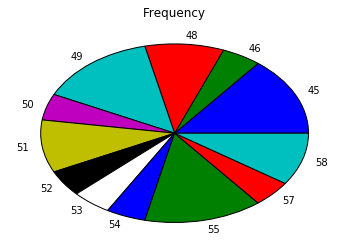

In [12]:
cursor.pie()

### 6: convert cursor to a pandas dataframe

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


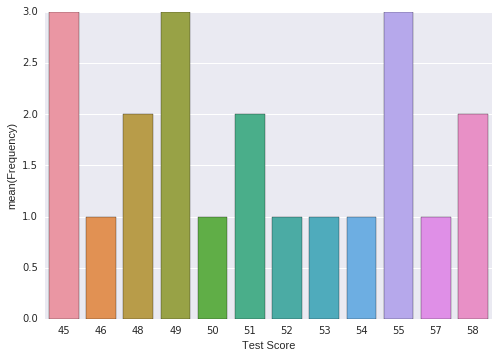

In [13]:
df = cursor.DataFrame()

%matplotlib inline
import seaborn

plot = seaborn.barplot(x='Test Score',y='Frequency', data=df)

### 7: %% Sql Magic configuration

In [14]:
%config SqlMagic

SqlMagic options
--------------
SqlMagic.autocommit=<Bool>
    Current: False
    Set autocommit mode
SqlMagic.autolimit=<Int>
    Current: 0
    Automatically limit the size of the returned result sets
SqlMagic.autopandas=<Bool>
    Current: False
    Return Pandas DataFrames instead of regular result sets
SqlMagic.column_local_vars=<Bool>
    Current: False
    Return data into local variables from column names
SqlMagic.displaylimit=<Int>
    Current: None
    Automatically limit the number of rows displayed (full result set is still
    stored)
SqlMagic.dsn_filename=<Unicode>
    Current: 'odbc.ini'
    Path to DSN file. When the first argument is of the form [section], a
    sqlalchemy connection string is formed from the matching section in the DSN
    file.
SqlMagic.feedback=<Bool>
    Current: True
    Print number of rows affected by DML
SqlMagic.short_errors=<Bool>
    Current: True
    Don't display the full traceback on SQL Programming Error
SqlMagic.style=<Unicode>
    Curr

In [15]:
%config SqlMagic.autocommit=False
%config SqlMagic.displaylimit=20
%config SqlMagic.feedback=True

### 8: close connection  
Disconnecting explicitly is not possible, simply halt the notebook

# Example: Chicago Public Schools - Progress Report Cards (2011-2012) 

The city of Chicago released a dataset showing all school level performance data used to create School Report Cards for the 2011-2012 school year. The dataset is available from the Chicago Data Portal: https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t

This dataset includes a large number of metrics. Start by familiarizing yourself with the types of metrics in the database: https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?download=true

Now download a static copy of this database and review some of its contents:
https://ibm.box.com/shared/static/0g7kbanvn5l2gt2qu38ukooatnjqyuys.csv


### 1. Store the dataset in a Table
In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

__It is highly recommended to manually load the table using the database console LOAD tool.__

Now open the Db2 console, open the LOAD tool, Select / Drag the .CSV file and load the dataset into a new table called __SCHOOLS__.
You will need to click on create "(+) New Table" and specify the name of the table you want to create and then click "Next". 

<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/uc4xjh1uxcc78ks1i18v668simioz4es.jpg"></a>

### 2. Connect to the database

In [1]:
%load_ext sql

In [2]:
%sql ibm_db_sa://cdq34813:1l7vj7-szs45d7qq@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

'Connected: cdq34813@BLUDB'

### 3. Query the database system catalog to retrieve table metadata

##### You can verify that the table creation was successful by retrieving the list of all tables in your schema and checking whether the SCHOOLS table was created

In [3]:
%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABSCHEMA = 'CDQ34813'

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,create_time
CDQ34813,INTERNATIONAL_STUDENT_TEST_SCORES,2018-08-16 10:10:17.330613
CDQ34813,INSTRUCTOR,2018-09-16 06:10:25.324141
CDQ34813,SCHOOLS,2018-09-16 08:05:27.553051


In [4]:
%sql select * from SYSCAT.TABLES where TABNAME = 'SCHOOLS'

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks
CDQ34813,SCHOOLS,CDQ34813,U,T,N,None,None,None,None,2018-09-16 08:05:27.553051,2018-09-16 08:05:27.553051,2018-09-16 08:05:27.553051,2018-09-16 08:09:04.570630,79,6,302,566,15,0,16,-1,-1,-1,0,cdq34813space1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,850,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2018-09-16 08:05:27.553051,0,,None,None,N,CDQ34813,,,,0001-01-01,,N,R,N,-1.0,None


### 4. Query the database system catalog to retrieve column metadata

##### The SCHOOLS table contains a large number of columns. How many columns does this table have?

In [5]:
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


colname,typename,length
9th Grade EXPLORE (2010),VARCHAR,4
10th Grade PLAN (2009),VARCHAR,4
10th Grade PLAN (2010),VARCHAR,4
Net_Change_EXPLORE_and_PLAN,VARCHAR,3
11th Grade Average ACT (2011),VARCHAR,4
Net_Change_PLAN_and_ACT,VARCHAR,3
College_Eligibility__,VARCHAR,4
Graduation_Rate__,VARCHAR,4
College_Enrollment_Rate__,VARCHAR,4
College_Enrollment__number_of_students_,SMALLINT,2


### 4. SQL examples

##### How many Elementary Schools are in the dataset?

In [6]:
%sql select count(*) from SCHOOLS where "Elementary, Middle, or High School" = 'ES'

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
462


##### What is the highest Safety Score?

In [7]:
%sql select MAX("Safety_Score") AS MAX_SAFETY_SCORE from SCHOOLS

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


max_safety_score
99


##### Which schools have highest Safety Score?

In [8]:
%sql select "Name_of_School", "Safety_Score" from SCHOOLS \
    where "Safety_Score" = (select MAX("Safety_Score") from SCHOOLS)

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,Safety_Score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


##### What are the top 10 schools with the highest "Average Student Attendance"?

In [9]:
%sql select "Name_of_School", "Average_Student_Attendance" from SCHOOLS \
    order by "Average_Student_Attendance" desc nulls last limit 10

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,Average_Student_Attendance
John Charles Haines Elementary School,98.4%
James Ward Elementary School,97.8%
Edgar Allan Poe Elementary Classical School,97.6%
Orozco Fine Arts & Sciences Elementary School,97.6%
Rachel Carson Elementary School,97.6%
Annie Keller Elementary Gifted Magnet School,97.5%
Andrew Jackson Elementary Language Academy,97.4%
Lenart Elementary Regional Gifted Center,97.4%
Disney II Magnet School,97.3%
John H Vanderpoel Elementary Magnet School,97.2%


##### Retrieve the list of 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance

In [10]:
%sql SELECT "Name_of_School", "Average_Student_Attendance" \
     from SCHOOLS \
     order by "Average_Student_Attendance" \
     fetch first 5 rows only

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,Average_Student_Attendance
Richard T Crane Technical Preparatory High School,57.9%
Barbara Vick Early Childhood & Family Center,60.9%
Dyett High School,62.5%
Wendell Phillips Academy High School,63.0%
Orr Academy High School,66.3%


##### Now remove the '%' sign from the above result set for Average Student Attendance column

In [11]:
%sql SELECT "Name_of_School", REPLACE("Average_Student_Attendance", '%', '') \
     from SCHOOLS \
     order by "Average_Student_Attendance" \
     fetch first 5 rows only

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,2
Richard T Crane Technical Preparatory High School,57.9
Barbara Vick Early Childhood & Family Center,60.9
Dyett High School,62.5
Wendell Phillips Academy High School,63.0
Orr Academy High School,66.3


##### Which Schools have Average Student Attendance lower than 70%?

In [12]:
%sql SELECT "Name_of_School", "Average_Student_Attendance" \
     from SCHOOLS \
     where CAST(REPLACE("Average_Student_Attendance", '%', '') AS DOUBLE) < 70 \
     order by "Average_Student_Attendance"

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,Average_Student_Attendance
Richard T Crane Technical Preparatory High School,57.9%
Barbara Vick Early Childhood & Family Center,60.9%
Dyett High School,62.5%
Wendell Phillips Academy High School,63.0%
Orr Academy High School,66.3%
Manley Career Academy High School,66.8%
Chicago Vocational Career Academy High School,68.8%
Roberto Clemente Community Academy High School,69.6%


##### Get the total __College Enrollment (number of students)__ for each Community Area

In [13]:
%sql select "Community_Area_Name", sum("College_Enrollment__number_of_students_") AS TOTAL_ENROLLMENT \
   from SCHOOLS \
   group by "Community_Area_Name" 

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Community_Area_Name,total_enrollment
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


##### Get the 5 Community Areas with the least total __College Enrollment (number of students)__  sorted in ascending order 

In [14]:
%sql select "Community_Area_Name", sum("College_Enrollment__number_of_students_") AS TOTAL_ENROLLMENT \
   from SCHOOLS \
   group by "Community_Area_Name" \
   order by TOTAL_ENROLLMENT asc \
   fetch first 5 rows only

 * ibm_db_sa://cdq34813:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Community_Area_Name,total_enrollment
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871
